In [2]:
!pip install pyspark

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, max, min, count, sum

spark = SparkSession.builder.appName("DataFrame-Exercises").getOrCreate()
student_data = [
  {
    "id": 1,
    "name": "Alice",
    "age": 20,
    "department": "Computer Science",
    "gpa": 3.8
  },
  {
    "id": 2,
    "name": "Bob",
    "age": 22,
    "department": "Electronics",
    "gpa": 3.5
  },
  {
    "id": 3,
    "name": "Charlie",
    "age": 21,
    "department": "Mechanical",
    "gpa": 3.2
  },
  {
    "id": 4,
    "name": "David",
    "age": 23,
    "department": "Civil",
    "gpa": 3.9
  },
  {
    "id": 5,
    "name": "Eva",
    "age": 20,
    "department": "IT",
    "gpa": 3.7
  }
]
student_df = spark.createDataFrame(student_data)
student_df.show()

library_data = [
    (101, 1, "Science", 550),
    (102, 2, "Economics", 250),
    (103, 3, "Zoology", 300),
    (104, 4, "Computer", 500),
    (105, 5, "Data", 700),
    (106, 3, "Signals", 500),
    (107, 1, "Tech", 350)
  ]
library_cols = ["book_id", "id", "book", "amount"]
library_df = spark.createDataFrame(library_data, library_cols)
library_df.show()

df = pd.DataFrame(student_data)
print("First 5 rows of dataset:")
print(df.head())

+---+----------------+---+---+-------+
|age|      department|gpa| id|   name|
+---+----------------+---+---+-------+
| 20|Computer Science|3.8|  1|  Alice|
| 22|     Electronics|3.5|  2|    Bob|
| 21|      Mechanical|3.2|  3|Charlie|
| 23|           Civil|3.9|  4|  David|
| 20|              IT|3.7|  5|    Eva|
+---+----------------+---+---+-------+

+-------+---+---------+------+
|book_id| id|     book|amount|
+-------+---+---------+------+
|    101|  1|  Science|   550|
|    102|  2|Economics|   250|
|    103|  3|  Zoology|   300|
|    104|  4| Computer|   500|
|    105|  5|     Data|   700|
|    106|  3|  Signals|   500|
|    107|  1|     Tech|   350|
+-------+---+---------+------+

First 5 rows of dataset:
   id     name  age        department  gpa
0   1    Alice   20  Computer Science  3.8
1   2      Bob   22       Electronics  3.5
2   3  Charlie   21        Mechanical  3.2
3   4    David   23             Civil  3.9
4   5      Eva   20                IT  3.7


In [14]:
student_df.select("name", "department").show()

+-------+----------------+
|   name|      department|
+-------+----------------+
|  Alice|Computer Science|
|    Bob|     Electronics|
|Charlie|      Mechanical|
|  David|           Civil|
|    Eva|              IT|
+-------+----------------+



In [18]:
student_df.filter (col("gpa") > 3.5).show()

+---+----------------+---+---+-----+
|age|      department|gpa| id| name|
+---+----------------+---+---+-----+
| 20|Computer Science|3.8|  1|Alice|
| 23|           Civil|3.9|  4|David|
| 20|              IT|3.7|  5|  Eva|
+---+----------------+---+---+-----+



In [20]:
student_df.groupBy("department").agg(avg("gpa")).show()

+----------------+--------+
|      department|avg(gpa)|
+----------------+--------+
|     Electronics|     3.5|
|Computer Science|     3.8|
|      Mechanical|     3.2|
|              IT|     3.7|
|           Civil|     3.9|
+----------------+--------+



In [22]:
student_df.select("age").distinct().show()
library_df.select("id").distinct().show()


+---+
|age|
+---+
| 22|
| 20|
| 21|
| 23|
+---+

+---+
| id|
+---+
|  1|
|  3|
|  2|
|  5|
|  4|
+---+



In [25]:
library_df.agg(max("amount"), min("amount")).show()

+-----------+-----------+
|max(amount)|min(amount)|
+-----------+-----------+
|        700|        250|
+-----------+-----------+



In [27]:
library_df.groupBy("id").agg(sum("amount").alias("total_spend")).show()

+---+-----------+
| id|total_spend|
+---+-----------+
|  1|        900|
|  3|        800|
|  2|        250|
|  5|        700|
|  4|        500|
+---+-----------+



In [29]:
student_df.join(library_df, "id", "inner").show()

+---+---+----------------+---+-------+-------+---------+------+
| id|age|      department|gpa|   name|book_id|     book|amount|
+---+---+----------------+---+-------+-------+---------+------+
|  1| 20|Computer Science|3.8|  Alice|    101|  Science|   550|
|  1| 20|Computer Science|3.8|  Alice|    107|     Tech|   350|
|  2| 22|     Electronics|3.5|    Bob|    102|Economics|   250|
|  3| 21|      Mechanical|3.2|Charlie|    103|  Zoology|   300|
|  3| 21|      Mechanical|3.2|Charlie|    106|  Signals|   500|
|  4| 23|           Civil|3.9|  David|    104| Computer|   500|
|  5| 20|              IT|3.7|    Eva|    105|     Data|   700|
+---+---+----------------+---+-------+-------+---------+------+



In [32]:
student_df.join(library_df, "id", "left").show()

+---+---+----------------+---+-------+-------+---------+------+
| id|age|      department|gpa|   name|book_id|     book|amount|
+---+---+----------------+---+-------+-------+---------+------+
|  1| 20|Computer Science|3.8|  Alice|    107|     Tech|   350|
|  1| 20|Computer Science|3.8|  Alice|    101|  Science|   550|
|  2| 22|     Electronics|3.5|    Bob|    102|Economics|   250|
|  5| 20|              IT|3.7|    Eva|    105|     Data|   700|
|  3| 21|      Mechanical|3.2|Charlie|    106|  Signals|   500|
|  3| 21|      Mechanical|3.2|Charlie|    103|  Zoology|   300|
|  4| 23|           Civil|3.9|  David|    104| Computer|   500|
+---+---+----------------+---+-------+-------+---------+------+



In [43]:
student_df.createOrReplaceTempView("student")
library_df.createOrReplaceTempView("library")

In [49]:
spark.sql("""
    SELECT s.department, SUM(l.amount) as total_due
    FROM student s
    JOIN library l ON s.id = l.id
    GROUP BY s.department
""").show()

+----------------+---------+
|      department|total_due|
+----------------+---------+
|      Mechanical|      800|
|     Electronics|      250|
|              IT|      700|
|           Civil|      500|
|Computer Science|      900|
+----------------+---------+



In [52]:
spark.sql("""
    SELECT s.name, SUM(l.amount) as total_due
    FROM student s
    JOIN library l ON s.id = l.id
    GROUP BY s.name
    ORDER BY total_due DESC
    LIMIT 5
""").show()

+-------+---------+
|   name|total_due|
+-------+---------+
|  Alice|      900|
|Charlie|      800|
|    Eva|      700|
|  David|      500|
|    Bob|      250|
+-------+---------+



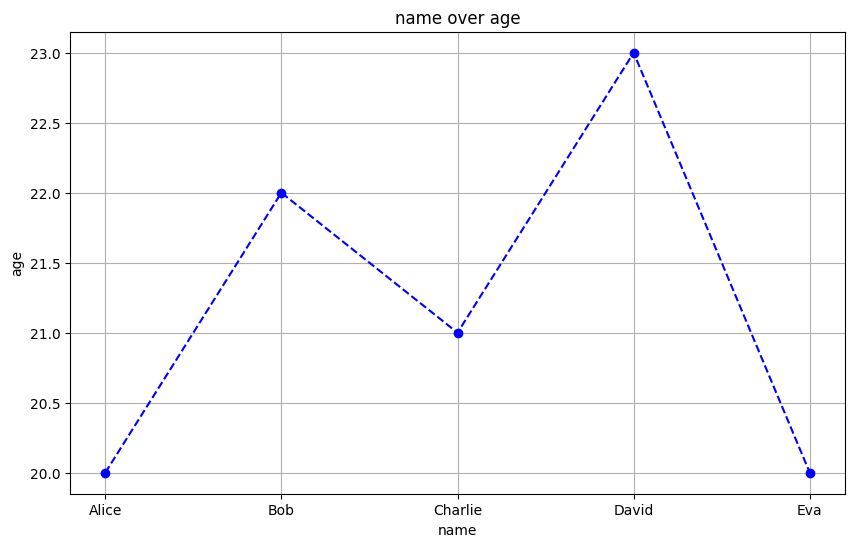

In [59]:
plt.figure(figsize=(10,6))
plt.plot(df["name"], df["age"], marker='o', linestyle='--', color='b')
plt.title("name over age")
plt.xlabel("name")
plt.ylabel("age")
plt.grid(True)
plt.show()